In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.io import fits
from matplotlib.colors import LogNorm

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def load_plz(pattern):
    
    files = sorted(glob.glob(pattern))
    files = map(fits.open, files)
    files = [file[0].data for file in files]
    return np.array(files)
    
def lazy_load_plz(pattern):
    
    files = sorted(glob.glob(pattern))
    files = map(fits.open, files)
    return files

def num_sd(arr):
    
    return np.abs(arr - arr.mean()) / arr.std()
    
def apply_mask(arr, mask):
    
    arr = arr.astype(np.float32)
    
    arr *= mask
    arr[1:-1, 1:-1] += ~mask[1:-1, 1:-1] * 0.25 * \
                      (arr[:-2, 1:-1] + arr[2:, 1:-1] +
                       arr[1:-1, :-2] + arr[1:-1, 2:])
    return arr

In [196]:
reduced_star = load_plz("data/*redu*")[0]

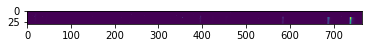

In [197]:
cropped= reduced_star[15:45,:]
plt.imshow(cropped)

In [103]:
ang_per_pix = 0.9747780194475906
#from lab0
temp = 11361
temp_err = 66 
h = 6.626e-34
c = 3*10**8
k = 1.381e-23
def blackbody(Lambda, T):
    return 2*h*c**2/Lambda**5/(np.exp(h*c/(Lambda*k*T))-1)    

In [164]:
attempt0 = np.mean(cropped,axis=0)

for i in range(len(attempt0)):
    if attempt0[i] == np.min(attempt0):
        H_abs_loc = i
    if attempt0[i] == np.min(attempt0[500:650]):
        H_abs2 = i
print(H_abs_loc, H_abs2)
shift1 = 4341 - H_abs_loc*ang_per_pix
shift2 = 4861 - H_abs2*ang_per_pix
shift = (shift1 + shift2) / 2
x = np.linspace(shift,shift+len(attempt0), 765)
print(shift)

20 585
4306.129649117103


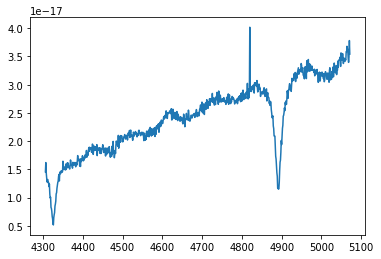

In [165]:
star_spec = attempt0/blackbody(x*1e-10,temp) #divide out some good blackbody stuff
plt.plot(x,star_spec)

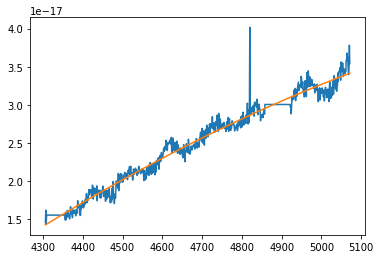

In [166]:
for i in range(len(star_spec)):
    if 2<i<50 :
        star_spec[i]=(star_spec[1]+star_spec[50])/2
    if 550<i<615:
        star_spec[i]=(star_spec[549]+star_spec[620])/2
N = 2
data_fitfunc = np.poly1d(np.polyfit(x,star_spec,N))
plt.plot(x,star_spec)
plt.plot(x,data_fitfunc(x))

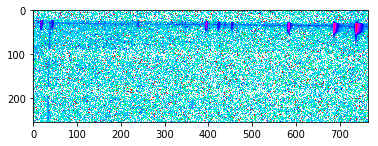

In [167]:
nebulae = sorted(glob.glob("data/nebula_reduced.fits"))
nebulae = list(map(fits.open, nebulae[:]))
nebulae = nebulae[0][0].data
plt.imshow(nebulae, cmap='hsv',norm=LogNorm(vmin=.0000001, vmax=2.5));

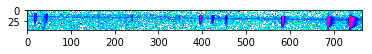

In [168]:
nebulae = nebulae[15:60, :]
plt.imshow(nebulae, cmap='hsv',norm=LogNorm(vmin=.0000001, vmax=2.5));

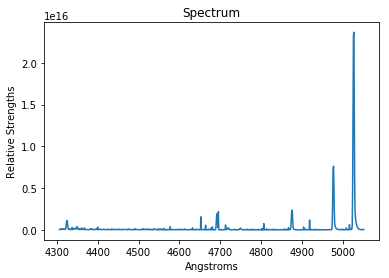

In [169]:
neb_norm = nebulae/data_fitfunc(x) #divide out data fit and destroy everything we worked for
mean = np.mean(neb_norm, axis=0)
ang_per_pix = 0.9747780194475906
#use shift to display angstroms of location
plt.plot(np.linspace(shift,shift + neb_norm.shape[1]*ang_per_pix, num=len(mean)),mean) 
#.97 is the angstroms per pixel that was previously calculated in lab0
plt.title("Spectrum")
plt.xlabel("Angstroms")
#plt.hlines(.05e16, 4300, 5000)
plt.ylabel("Relative Strengths");

In [170]:
np.max(mean)

2.363841055082863e+16

In [171]:
indices, = np.nonzero(mean > .1e16)
jumps = (indices[1:] - indices[:-1]) != 1

lows = list(indices[1:][jumps])
highs = list(indices[:-1][jumps])

lows = [0] + lows
highs = highs + [len(mean)]

In [172]:
indices = [mean[lo:hi].argmax() + lo if lo != hi else lo
           for lo, hi in zip(lows, highs)]

indices = np.array(indices)

In [173]:
len(highs)

8

In [174]:
emission_lines = indices*ang_per_pix + shift
emission_line_strengths = mean[indices]

In [179]:
emission_line_strengths, emission_lines

(array([1.02830859e+15, 1.57757327e+15, 1.92332566e+15, 2.19632001e+15,
        2.38803563e+15, 1.18959326e+15, 7.62693514e+15, 2.36384106e+16]),
 array([4323.67565347, 4652.17584602, 4691.1669668 , 4695.06607888,
        4875.40001247, 4918.29024533, 4976.7769265 , 5026.49060549]))

In [124]:
len(nebulae[0])

765